In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from IPython.display import display

print("Montando Google Drive...")
drive.mount('/content/drive')

ruta_train = "/content/drive/My Drive/DataSets/train.csv"
ruta_test = "/content/drive/My Drive/DataSets/test.csv"

df_train = pd.read_csv(ruta_train)
df_test = pd.read_csv(ruta_test)

#Concatenar ambos datasets para el análisis no supervisado
#Para clustering o reducción de dimensionalidad, es común trabajar con todo el conjunto de datos disponible.
df_airline = pd.concat([df_train, df_test], ignore_index=True)
print(f"Dataset combinado creado con {df_airline.shape[0]} filas y {df_airline.shape[1]} columnas.")

print("\n--- Primeras 5 filas del dataset combinado (df_airline): ---")
display(df_airline.head())

print("\n--- Información general del dataset combinado: ---")
df_airline.info()

print("\n--- Recuento de valores nulos por columna en el dataset combinado: ---")
print(df_airline.isnull().sum())

Montando Google Drive...
Mounted at /content/drive
Dataset combinado creado con 129880 filas y 25 columnas.

--- Primeras 5 filas del dataset combinado (df_airline): ---


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied



--- Información general del dataset combinado: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  

In [3]:
# Eliminar las columnas 'Unnamed: 0' e 'id'
print("Columnas originales:", df_airline.columns.tolist())
df_airline_processed = df_airline.drop(columns=['Unnamed: 0', 'id'], errors='ignore')
print("Columnas después de eliminar 'Unnamed: 0' e 'id':", df_airline_processed.columns.tolist())

# Imputar los valores nulos en 'Arrival Delay in Minutes' con la mediana
median_arrival_delay = df_airline_processed['Arrival Delay in Minutes'].median()
df_airline_processed['Arrival Delay in Minutes'].fillna(median_arrival_delay, inplace=True)
print("Verificación de nulos después de la imputación:")
print(df_airline_processed.isnull().sum().sum())

# Separar columnas numéricas y categoricas para el preprocesamiento
numerical_cols = df_airline_processed.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_airline_processed.select_dtypes(include='object').columns.tolist()

print(f"\nColumnas numericas identificadas: {numerical_cols}")
print(f"Columnas categoricas identificadas: {categorical_cols}")

from sklearn.preprocessing import OneHotEncoder

# Aplicar One-Hot Encoding a las columnas categóricas
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df_airline_processed[categorical_cols])

# Crear un DataFrame con las caracteristicas codificadas
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_airline_processed.index)

# Unir las caracteristicas numericas con las codificadas
df_final = pd.concat([df_airline_processed[numerical_cols], df_encoded], axis=1)

print("\n--- Primeras 5 filas del dataset después del preprocesamiento (df_final): ---")
display(df_final.head())

print("\n--- Información del dataset final después del preprocesamiento: ---")
df_final.info()

Columnas originales: ['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']
Columnas después de eliminar 'Unnamed: 0' e 'id': ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']
Ver

<ipython-input-3-140ede7b8ab6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_airline_processed['Arrival Delay in Minutes'].fillna(median_arrival_delay, inplace=True)



--- Primeras 5 filas del dataset después del preprocesamiento (df_final): ---


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,25,235,3,2,3,3,1,3,1,1,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,25,562,2,5,5,5,2,2,2,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,61,214,3,3,3,3,4,5,5,3,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0



--- Información del dataset final después del preprocesamiento: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 29 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Age                                   129880 non-null  int64  
 1   Flight Distance                       129880 non-null  int64  
 2   Inflight wifi service                 129880 non-null  int64  
 3   Departure/Arrival time convenient     129880 non-null  int64  
 4   Ease of Online booking                129880 non-null  int64  
 5   Gate location                         129880 non-null  int64  
 6   Food and drink                        129880 non-null  int64  
 7   Online boarding                       129880 non-null  int64  
 8   Seat comfort                          129880 non-null  int64  
 9   Inflight entertainment                129880 non-null  int64  
 10 

In [4]:
from sklearn.preprocessing import StandardScaler

# Columnas numéricas originales (no categóricas), que sí deben escalarse:
cols_to_scale = [
    'Age', 'Flight Distance', 'Inflight wifi service',
    'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
    'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

# Asegurarse de que todas las columnas a escalar existen en df_final
cols_to_scale = [col for col in cols_to_scale if col in df_final.columns]

# Aplicar StandardScaler
scaler = StandardScaler()
df_scaled_features = scaler.fit_transform(df_final[cols_to_scale])

# Crear un DataFrame con las características escaladas
df_scaled = pd.DataFrame(df_scaled_features, columns=cols_to_scale, index=df_final.index)

# Reintegrar las columnas que no fueron escaladas (las binarias de OneHotEncoder)
non_scaled_cols = [col for col in df_final.columns if col not in cols_to_scale]
df_processed_scaled = pd.concat([df_scaled, df_final[non_scaled_cols]], axis=1)

print("\n--- Primeras 5 filas del dataset después del escalado (df_processed_scaled): ---")
display(df_processed_scaled.head())


--- Primeras 5 filas del dataset después del escalado (df_processed_scaled): ---


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,-1.747961,-0.732184,0.204090,0.617265,0.173445,-1.546267,1.349867,-0.187037,1.181428,1.230787,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.954274,-0.957760,0.204090,-0.692719,0.173445,0.018048,-1.657814,-0.187037,-1.850520,-1.767616,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.888133,-0.048440,-0.548166,-0.692719,-0.539957,-0.764109,1.349867,1.293662,1.181428,1.230787,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.954274,-0.629924,-0.548166,1.272257,1.600249,1.582364,-0.905894,-0.927386,-1.092533,-1.018015,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.426788,-0.978814,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,1.181428,-0.268414,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


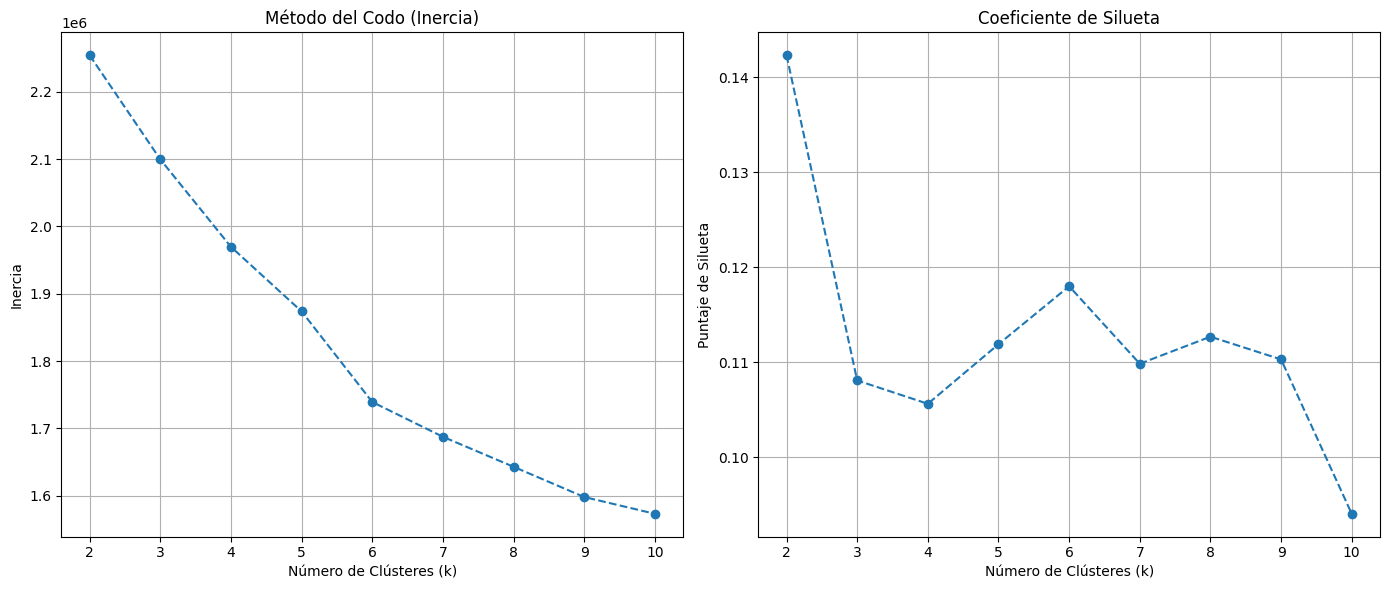

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

k_range = range(2, 11) # El Coeficiente de Silueta requiere al menos 2 clústeres
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_processed_scaled)

    inertia.append(kmeans.inertia_)

    score = silhouette_score(df_processed_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(14, 6))

# Gráfico del Método del Codo
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Método del Codo (Inercia)')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)

# Gráfico del Coeficiente de Silueta
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Puntaje de Silueta')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


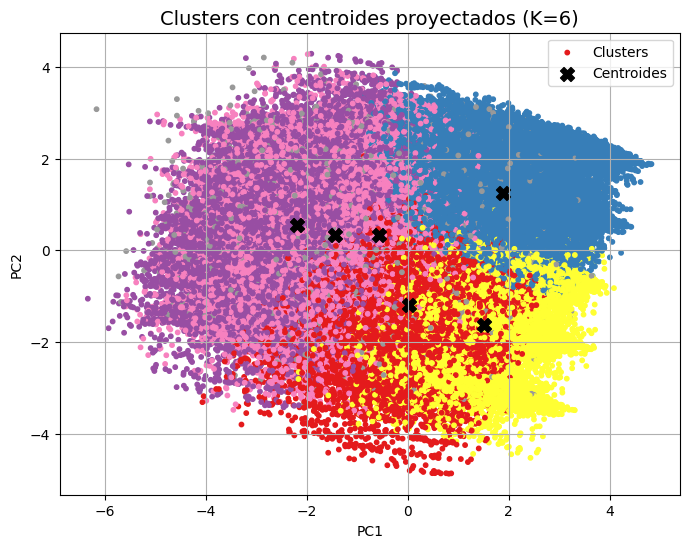

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar PCA para reducir el dataset a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Ejecutar K-Means con K=6
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(df_scaled)

# Proyectar los centroides al mismo espacio PCA
centroides_pca = pca.transform(kmeans.cluster_centers_)

# Crear una sola figura con clusters y centroides
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='Set1', s=10, label="Clusters")
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='black', s=100, marker='X', label='Centroides')
plt.title("Clusters con centroides proyectados (K=6)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

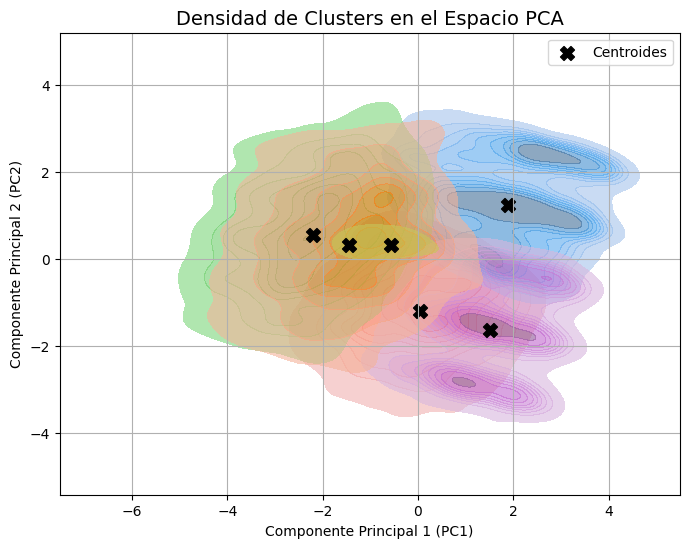

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las componentes principales y los clusters asignados
df_pca_cluster = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca_cluster["Cluster"] = y_pred  # Asignar los clusters predichos

# Crear el gráfico de densidades
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df_pca_cluster["PC1"], y=df_pca_cluster["PC2"], hue=df_pca_cluster["Cluster"], fill=True, alpha=0.6, palette="Set1")

# Agregar los centroides sobre el gráfico de densidad
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='black', s=100, marker='X', label="Centroides")

plt.title("Densidad de Clusters en el Espacio PCA", fontsize=14)
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.legend()
plt.grid(True)
plt.show()